Install Packages

In [1]:
!pip install face_recognition


     |████████████████████████████████| 100.1 MB 16 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=da2df365800714ae1da7df537eae87a5fd3a2523652a268efc6339035d8c9842
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [2]:
!pip install pillow

In [3]:
import PIL.Image
import PIL.ImageDraw
import face_recognition

Load your input picture.

This part of the code locates the faces in the picture.

In [15]:
# Load the jpg file into a numpy array
image = face_recognition.load_image_file("/content/Hogwarts.jpg")

# Find all the faces in the image
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("I found {} face(s) in this photograph.".format(number_of_faces))

# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image = PIL.Image.fromarray(image)

for face_location in face_locations:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline="red")

# Display the image on screen
pil_image.show()

pil_image.save("Location.png")

I found 3 face(s) in this photograph.
A face is located at pixel location Top: 166, Left: 782, Bottom: 255, Right: 872
A face is located at pixel location Top: 116, Left: 426, Bottom: 223, Right: 533
A face is located at pixel location Top: 116, Left: 223, Bottom: 223, Right: 330


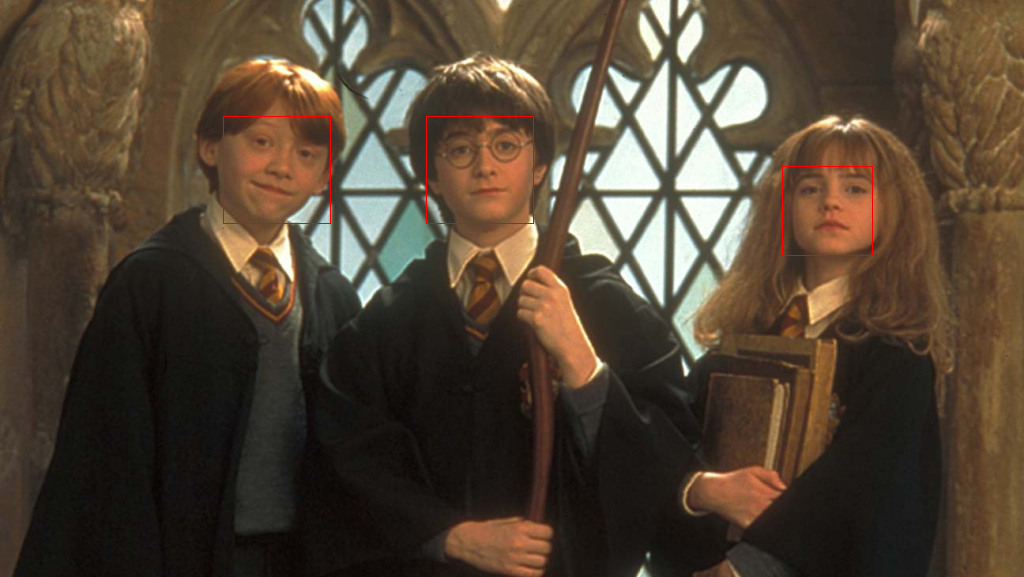

In [5]:
face_locations

[(166, 872, 255, 782), (116, 533, 223, 426), (116, 330, 223, 223)]

Load the Input picture.

This part of the code locates the chin, left-eyebrow, right-eyebrow, nose-bridge, nose tip, left eye, right eye, top-lip, bottom-lip in each face in the picture.

In [14]:
import PIL.Image
import PIL.ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("/content/Hogwarts.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

number_of_faces = len(face_landmarks_list)
print("I found {} face(s) in this photograph.".format(number_of_faces))

# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image = PIL.Image.fromarray(image)

# Create a PIL drawing object to be able to draw lines later
draw = PIL.ImageDraw.Draw(pil_image)

# Loop over each face
for face_landmarks in face_landmarks_list:

    # Loop over each facial feature (eye, nose, mouth, lips, etc)
    for name, list_of_points in face_landmarks.items():

        # Print the location of each facial feature in this image
        print("The {} in this face has the following points: {}".format(name, list_of_points))

        # Let's trace out each facial feature in the image with a line!
        draw.line(list_of_points, fill="red", width=2)

pil_image.show()

pil_image.save("Landmarks.png")


I found 3 face(s) in this photograph.
The chin in this face has the following points: [(788, 198), (788, 208), (790, 219), (791, 229), (794, 239), (800, 247), (809, 252), (819, 255), (832, 256), (844, 255), (856, 251), (868, 247), (876, 241), (880, 231), (883, 221), (885, 210), (887, 199)]
The left_eyebrow in this face has the following points: [(794, 183), (800, 176), (808, 173), (817, 173), (825, 176)]
The right_eyebrow in this face has the following points: [(839, 175), (848, 172), (859, 172), (868, 176), (875, 183)]
The nose_bridge in this face has the following points: [(832, 185), (831, 190), (830, 195), (830, 200)]
The nose_tip in this face has the following points: [(823, 210), (826, 211), (830, 211), (835, 211), (839, 210)]
The left_eye in this face has the following points: [(803, 191), (809, 188), (815, 188), (820, 191), (815, 192), (809, 193)]
The right_eye in this face has the following points: [(846, 191), (852, 187), (858, 188), (863, 191), (858, 193), (852, 192)]
The to

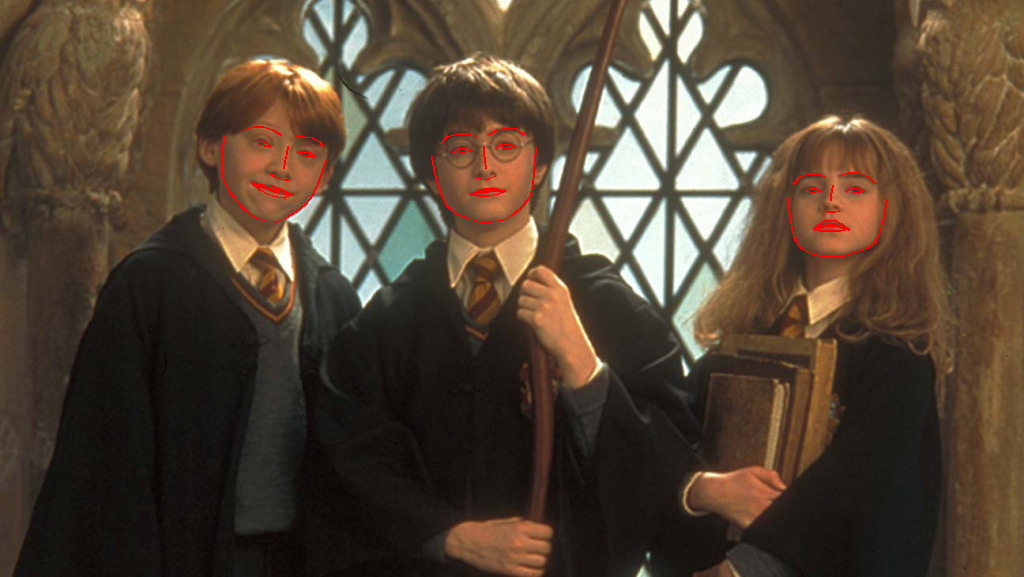

This part of the code generates the face_encodings for each face in the picture. 

Here I have printed the first face encoding found in the input picture. 

In [16]:
import face_recognition

# Load the jpg files into numpy arrays
image = face_recognition.load_image_file("/content/Hogwarts.jpg")

# Generate the face encodings
face_encodings = face_recognition.face_encodings(image)

if len(face_encodings) == 0:
    # No faces found in the image.
    print("No faces were found.")

else:
    # Grab the first face encoding
    first_face_encoding = face_encodings[0]

    # Print the results
    print(first_face_encoding)


[-8.21097642e-02  1.07798941e-01  2.80139334e-02 -1.09793082e-01
 -1.80964291e-01 -4.88269329e-02  5.27053103e-02 -4.12037447e-02
  1.80130571e-01 -1.40819550e-01  2.13451803e-01 -4.83083278e-02
 -2.22509727e-01  1.56180710e-02 -9.38135162e-02  2.41654098e-01
 -2.36257285e-01 -1.58325583e-01 -1.09632015e-01 -8.01197067e-02
  6.25848770e-04  6.39519989e-02 -1.54803135e-02  1.39464974e-01
 -2.42268100e-01 -3.19659024e-01 -1.11092389e-01 -1.36018425e-01
 -4.68988754e-02 -7.04594702e-02  3.46486345e-02  1.11619249e-01
 -1.24064744e-01 -2.52225846e-02  4.35441062e-02  5.43570668e-02
 -2.07879748e-02 -9.12270322e-02  2.41509721e-01  1.14114001e-01
 -2.29070500e-01  5.06785437e-02  1.01594836e-01  4.04149830e-01
  2.22542390e-01 -3.23299319e-02  7.42931962e-02 -5.54483570e-02
  2.20768973e-01 -3.11121881e-01  5.15770093e-02  7.79123008e-02
  1.14073321e-01  1.09322108e-01  5.39123155e-02 -8.61078277e-02
  5.50050884e-02  2.23521784e-01 -3.09436232e-01  3.91401201e-02
  5.56983873e-02 -1.27025

Creating a list of all known face encodings. We use 3 pictures ( Harry Potter, Ron Weasley, Hermoine Granger).

Use an input image and find the known faces in it.

In [17]:
import face_recognition

# Load the known images
image_of_person_1 = face_recognition.load_image_file("/content/Harry Potter.jpg")
image_of_person_2 = face_recognition.load_image_file("/content/Ron Weasley.jfif")
image_of_person_3 = face_recognition.load_image_file("/content/Hermoine Granger.jpg")

# Get the face encoding of each person. This can fail if no one is found in the photo.
person_1_face_encoding = face_recognition.face_encodings(image_of_person_1)[0]
person_2_face_encoding = face_recognition.face_encodings(image_of_person_2)[0]
person_3_face_encoding = face_recognition.face_encodings(image_of_person_3)[0]

# Create a list of all known face encodings
known_face_encodings = [
    person_1_face_encoding,
    person_2_face_encoding,
    person_3_face_encoding
]

# Load the image we want to check
unknown_image = face_recognition.load_image_file("/content/Hogwarts.jpg")

# Get face encodings for any people in the picture
face_locations = face_recognition.face_locations(unknown_image, number_of_times_to_upsample=2)
unknown_face_encodings = face_recognition.face_encodings(unknown_image, known_face_locations=face_locations)

# There might be more than one person in the photo, so we need to loop over each face we found
for unknown_face_encoding in unknown_face_encodings:

    # Test if this unknown face encoding matches any of the three people we know
    results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance=0.6)

    name = "Unknown"

    if results[0]:
        name = "Harry Potter"
    elif results[1]:
        name = "Ron Weasley"
    elif results[2]:
        name = "Hermoine Granger"

    print(f"Found {name} in the photo!")


Found Harry Potter in the photo!
Found Hermoine Granger in the photo!
Found Ron Weasley in the photo!
